# Relevant Libraries

In [1]:
import numpy as np
import pandas as pd

# Data Reading

In [2]:
#data= pd.read_csv("project_data.csv", header=1)
data= pd.read_excel("GDP.xlsx", header=0,sheet_name="Sheet2")
pd.set_option('display.max_columns', None)

# Pre-processing

In [3]:
#Want to know the number of columns and rows present
data.shape

(44, 20)

44 rows and 20 columns

In [4]:
#Check for data types
display(data.head(), data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   INDICATOR NAME                                                    44 non-null     int64  
 1   Inflation, GDP deflator (annual %)                                44 non-null     float64
 2   UNEMPLOYMENT RATE                                                 24 non-null     float64
 3   real effective exchaneg rate                                      44 non-null     float64
 4   Foreign direct investment, net inflows (BoP, current US$)         43 non-null     float64
 5   Foreign direct investment, net inflows (% of GDP)                 42 non-null     float64
 6   Imports of goods, services and primary income (BoP, current US$)  43 non-null     float64
 7   Exports of goods and services (BoP, c

,INDICATOR NAME,"Inflation, GDP deflator (annual %)",UNEMPLOYMENT RATE,real effective exchaneg rate,"Foreign direct investment, net inflows (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)","Imports of goods, services and primary income (BoP, current US$)","Exports of goods and services (BoP, current US$)",TRADE BALANCE,EXCHANGE RATE,POPULATION GROWTH,"Population, total",LABOUR FORCE,AGR PROD (CROP),INDUSTR PROD,BROAD MONEY (% of GDP),GOVT EXP,gross capital formation,GDP GROWTH RATE,GDP
0,1980,51.126135,NaN,664.836969,1.560000e+07,0.350938,1.263500e+09,2.521967,-1.263500e+09,664.836969,2.990447,11865246,NaN,19.99,5.275934e+08,19.59,NaN,NaN,0.471696,4.445228e+09
1,1981,75.633566,NaN,1482.347028,1.626375e+07,0.385174,1.335600e+09,-0.660372,-1.335600e+09,1482.347028,2.888406,12212960,NaN,19.59,3.868605e+08,17.93,NaN,NaN,-3.503067,4.222442e+09
2,1982,27.890579,NaN,1851.273768,1.630000e+07,0.403866,9.051346e+08,0.602537,-9.051346e+08,1851.273768,3.000604,12584976,NaN,17.93,2.521475e+08,17.78,NaN,NaN,-6.923650,4.035994e+09
3,1983,123.061214,NaN,3053.881734,2.400000e+06,0.059153,7.240647e+08,0.264745,-7.240647e+08,3053.881734,3.122420,12984131,NaN,17.78,2.689374e+08,23.15,NaN,3.749769,-4.563738,4.057275e+09
4,1984,35.312424,NaN,483.639456,2.000000e+06,0.045328,8.128000e+08,-0.069648,-8.128000e+08,483.639456,2.722554,13342487,NaN,23.15,4.669113e+08,22.92,NaN,6.876823,8.647569,4.412280e+09


None

"Population, total" should also be an integer

In [5]:
#Checking for missing values
missing=data.isnull().sum()*100/data.shape[0]
missing

INDICATOR NAME                                                       0.000000
Inflation, GDP deflator (annual %)                                   0.000000
UNEMPLOYMENT RATE                                                   45.454545
real effective exchaneg rate                                         0.000000
Foreign direct investment, net inflows (BoP, current US$)            2.272727
Foreign direct investment, net inflows (% of GDP)                    4.545455
Imports of goods, services and primary income (BoP, current US$)     2.272727
Exports of goods and services (BoP, current US$)                     0.000000
TRADE BALANCE                                                        2.272727
EXCHANGE RATE                                                        0.000000
POPULATION GROWTH                                                    0.000000
Population, total                                                    0.000000
LABOUR FORCE                                                    

### Dealing with missing values

In [6]:

import pandas as pd
from sklearn.impute import SimpleImputer

#UNEMPLOYMENT RATE (45.45% missing)
# Since this has a high percentage of missing data, we'll drop the column
data = data.drop('UNEMPLOYMENT RATE', axis=1)

#LABOUR FORCE (25% missing)
# Use mean imputation to fill in the missing values
imputer = SimpleImputer(strategy='mean')
data['LABOUR FORCE'] = imputer.fit_transform(data[['LABOUR FORCE']])

#GOVT EXP (50% missing) 
#This column has too many missing values, so we'll drop it
data = data.drop('GOVT EXP', axis=1)

#Foreign direct investment, net inflows (% of GDP) (4.55% missing)
# Use median imputation to fill in the missing values
imputer = SimpleImputer(strategy='median')
data['Foreign direct investment, net inflows (% of GDP)'] = imputer.fit_transform(data[['Foreign direct investment, net inflows (% of GDP)']])

#BROAD MONEY (% of GDP) (4.55% missing) and gross capital formation (6.82% missing)
#Use mean imputation to fill in the missing values
imputer = SimpleImputer(strategy='mean')
data['BROAD MONEY (% of GDP)'] = imputer.fit_transform(data[['BROAD MONEY (% of GDP)']])
data['gross capital formation'] = imputer.fit_transform(data[['gross capital formation']])

# Check for any remaining missing values
print(data.isnull().sum())

INDICATOR NAME                                                      0
Inflation, GDP deflator (annual %)                                  0
real effective exchaneg rate                                        0
Foreign direct investment, net inflows (BoP, current US$)           1
Foreign direct investment, net inflows (% of GDP)                   0
Imports of goods, services and primary income (BoP, current US$)    1
Exports of goods and services (BoP, current US$)                    0
TRADE BALANCE                                                       1
EXCHANGE RATE                                                       0
POPULATION GROWTH                                                   0
Population, total                                                   0
LABOUR FORCE                                                        0
AGR PROD (CROP)                                                     1
INDUSTR PROD                                                        0
BROAD MONEY (% of GD

In [7]:
data=data.dropna()
data.isnull().sum()

INDICATOR NAME                                                      0
Inflation, GDP deflator (annual %)                                  0
real effective exchaneg rate                                        0
Foreign direct investment, net inflows (BoP, current US$)           0
Foreign direct investment, net inflows (% of GDP)                   0
Imports of goods, services and primary income (BoP, current US$)    0
Exports of goods and services (BoP, current US$)                    0
TRADE BALANCE                                                       0
EXCHANGE RATE                                                       0
POPULATION GROWTH                                                   0
Population, total                                                   0
LABOUR FORCE                                                        0
AGR PROD (CROP)                                                     0
INDUSTR PROD                                                        0
BROAD MONEY (% of GD

In [8]:
data.head()

,INDICATOR NAME,"Inflation, GDP deflator (annual %)",real effective exchaneg rate,"Foreign direct investment, net inflows (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)","Imports of goods, services and primary income (BoP, current US$)","Exports of goods and services (BoP, current US$)",TRADE BALANCE,EXCHANGE RATE,POPULATION GROWTH,"Population, total",LABOUR FORCE,AGR PROD (CROP),INDUSTR PROD,BROAD MONEY (% of GDP),gross capital formation,GDP GROWTH RATE,GDP
0,1980,51.126135,664.836969,1.560000e+07,0.350938,1.263500e+09,2.521967,-1.263500e+09,664.836969,2.990447,11865246,1.035862e+07,19.99,5.275934e+08,19.59,18.410891,0.471696,4.445228e+09
1,1981,75.633566,1482.347028,1.626375e+07,0.385174,1.335600e+09,-0.660372,-1.335600e+09,1482.347028,2.888406,12212960,1.035862e+07,19.59,3.868605e+08,17.93,18.410891,-3.503067,4.222442e+09
2,1982,27.890579,1851.273768,1.630000e+07,0.403866,9.051346e+08,0.602537,-9.051346e+08,1851.273768,3.000604,12584976,1.035862e+07,17.93,2.521475e+08,17.78,18.410891,-6.923650,4.035994e+09
3,1983,123.061214,3053.881734,2.400000e+06,0.059153,7.240647e+08,0.264745,-7.240647e+08,3053.881734,3.122420,12984131,1.035862e+07,17.78,2.689374e+08,23.15,3.749769,-4.563738,4.057275e+09
4,1984,35.312424,483.639456,2.000000e+06,0.045328,8.128000e+08,-0.069648,-8.128000e+08,483.639456,2.722554,13342487,1.035862e+07,23.15,4.669113e+08,22.92,6.876823,8.647569,4.412280e+09


# Exploratory Data Analysis(EDA)

In [9]:
#Data types
data["LABOUR FORCE"]=data["LABOUR FORCE"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 0 to 42
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   INDICATOR NAME                                                    43 non-null     int64  
 1   Inflation, GDP deflator (annual %)                                43 non-null     float64
 2   real effective exchaneg rate                                      43 non-null     float64
 3   Foreign direct investment, net inflows (BoP, current US$)         43 non-null     float64
 4   Foreign direct investment, net inflows (% of GDP)                 43 non-null     float64
 5   Imports of goods, services and primary income (BoP, current US$)  43 non-null     float64
 6   Exports of goods and services (BoP, current US$)                  43 non-null     float64
 7   TRADE BALANCE                             

In [10]:
#Summary Statistics
data.describe()

,INDICATOR NAME,"Inflation, GDP deflator (annual %)",real effective exchaneg rate,"Foreign direct investment, net inflows (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)","Imports of goods, services and primary income (BoP, current US$)","Exports of goods and services (BoP, current US$)",TRADE BALANCE,EXCHANGE RATE,POPULATION GROWTH,"Population, total",LABOUR FORCE,AGR PROD (CROP),INDUSTR PROD,BROAD MONEY (% of GDP),gross capital formation,GDP GROWTH RATE,GDP
count,43.000000,43.000000,43.000000,4.300000e+01,43.000000,4.300000e+01,43.000000,4.300000e+01,43.000000,43.000000,4.300000e+01,4.300000e+01,43.000000,4.300000e+01,43.000000,43.000000,43.000000,4.300000e+01
mean,2001.000000,28.945774,273.882056,1.105220e+09,2.987576,1.003034e+10,2.630225,-1.003034e+10,273.882056,2.481664,2.124730e+07,1.025331e+07,62.004186,6.415610e+09,63.004524,18.586781,4.496942,2.355284e+10
std,12.556539,22.110657,555.709845,1.398515e+09,2.835072,1.063632e+10,2.917263,1.063632e+10,555.709845,0.254134,6.543732e+06,2.052440e+06,35.115147,7.892785e+09,34.497022,6.034436,3.541667,2.494230e+10
min,1980.000000,8.481070,68.193286,2.000000e+06,0.045328,7.240647e+08,-0.660372,-3.168342e+10,68.193286,1.938983,1.186525e+07,6.558143e+06,17.780000,2.521475e+08,17.780000,3.749769,-6.923650,4.035994e+09
25%,1990.500000,15.084499,88.361135,1.815000e+07,0.368056,1.663926e+09,0.294249,-2.093244e+10,88.361135,2.343952,1.564523e+07,8.864134e+06,31.620000,1.051287e+09,34.510000,14.914271,3.758752,5.380628e+09
50%,2001.000000,22.818585,103.988148,1.449700e+08,1.942911,3.814030e+09,1.647489,-3.814030e+09,103.988148,2.460596,2.019558e+07,1.035862e+07,53.670000,1.890460e+09,59.720000,18.410891,4.794899,7.482069e+09
75%,2011.500000,34.110399,141.900118,2.570070e+09,5.262524,2.093244e+10,4.707294,-1.663926e+09,141.900118,2.622313,2.653235e+07,1.139889e+07,89.835000,1.029344e+10,89.835000,23.023159,5.764086,4.030418e+10
max,2022.000000,123.061214,3053.881734,3.879831e+09,9.466439,3.168342e+10,9.466439,-7.240647e+08,3053.881734,3.122420,3.347587e+07,1.454932e+07,137.060000,2.337072e+10,137.060000,29.002141,14.047124,7.952442e+10


SUMMARY

Inflation:\
The GDP deflator inflation rate in Ghana has been quite volatile, ranging from around 8.5% to as high as 123% \
over the 43-year period.
The average inflation rate was 29%, indicating Ghana has struggled with high and persistent inflation during this time.

Exchange Rate:\
The real effective exchange rate index has seen significant fluctuations, with a mean of 274 and a standard deviation\
of over 550.\
This points to substantial volatility and changes in Ghana's exchange rate over the decades. Which makes a lot of sense considering the various phases of development the US has been through.

Foreign Direct Investment:\
Net FDI inflows into Ghana have ranged from as low as 2 million to as high as 3.9 billion.\
On average, FDI inflows have been around 1.1 billion per year, representing 1.1\% of GDP.\
This suggests Ghana has had varying success in attracting foreign investment over time. 

Trade Balance:\
Ghana has consistently run large trade deficits, with imports averaging 10 billion and exports only 2.6 billion per year.
This trade deficit of around 7.4 billion per year is significant for the Ghanaian economy.(You can talk about your economics things)

Overall Economic Growth:\
Ghana's GDP growth has averaged around 4.5\% annually, but has ranged from -6.9% to as high as 14%.
The economy has seen periods of both strong and weak growth over the past four decades.

In [11]:
#Changing Column names to something nice
data.columns=['Year', 'Inflation', 'real_fx', 'FDI_BoP', 'FDI_GDP', 'IM', 'EX', 'BoT',\
               'Fx', 'population growth', 'population', 'labour', 'Agric','Industrial','M3','GCF','GDP rate','GDP']
data.head()

,Year,Inflation,real_fx,FDI_BoP,FDI_GDP,IM,EX,BoT,Fx,population growth,population,labour,Agric,Industrial,M3,GCF,GDP rate,GDP
0,1980,51.126135,664.836969,1.560000e+07,0.350938,1.263500e+09,2.521967,-1.263500e+09,664.836969,2.990447,11865246,10358623,19.99,5.275934e+08,19.59,18.410891,0.471696,4.445228e+09
1,1981,75.633566,1482.347028,1.626375e+07,0.385174,1.335600e+09,-0.660372,-1.335600e+09,1482.347028,2.888406,12212960,10358623,19.59,3.868605e+08,17.93,18.410891,-3.503067,4.222442e+09
2,1982,27.890579,1851.273768,1.630000e+07,0.403866,9.051346e+08,0.602537,-9.051346e+08,1851.273768,3.000604,12584976,10358623,17.93,2.521475e+08,17.78,18.410891,-6.923650,4.035994e+09
3,1983,123.061214,3053.881734,2.400000e+06,0.059153,7.240647e+08,0.264745,-7.240647e+08,3053.881734,3.122420,12984131,10358623,17.78,2.689374e+08,23.15,3.749769,-4.563738,4.057275e+09
4,1984,35.312424,483.639456,2.000000e+06,0.045328,8.128000e+08,-0.069648,-8.128000e+08,483.639456,2.722554,13342487,10358623,23.15,4.669113e+08,22.92,6.876823,8.647569,4.412280e+09


### Visualization

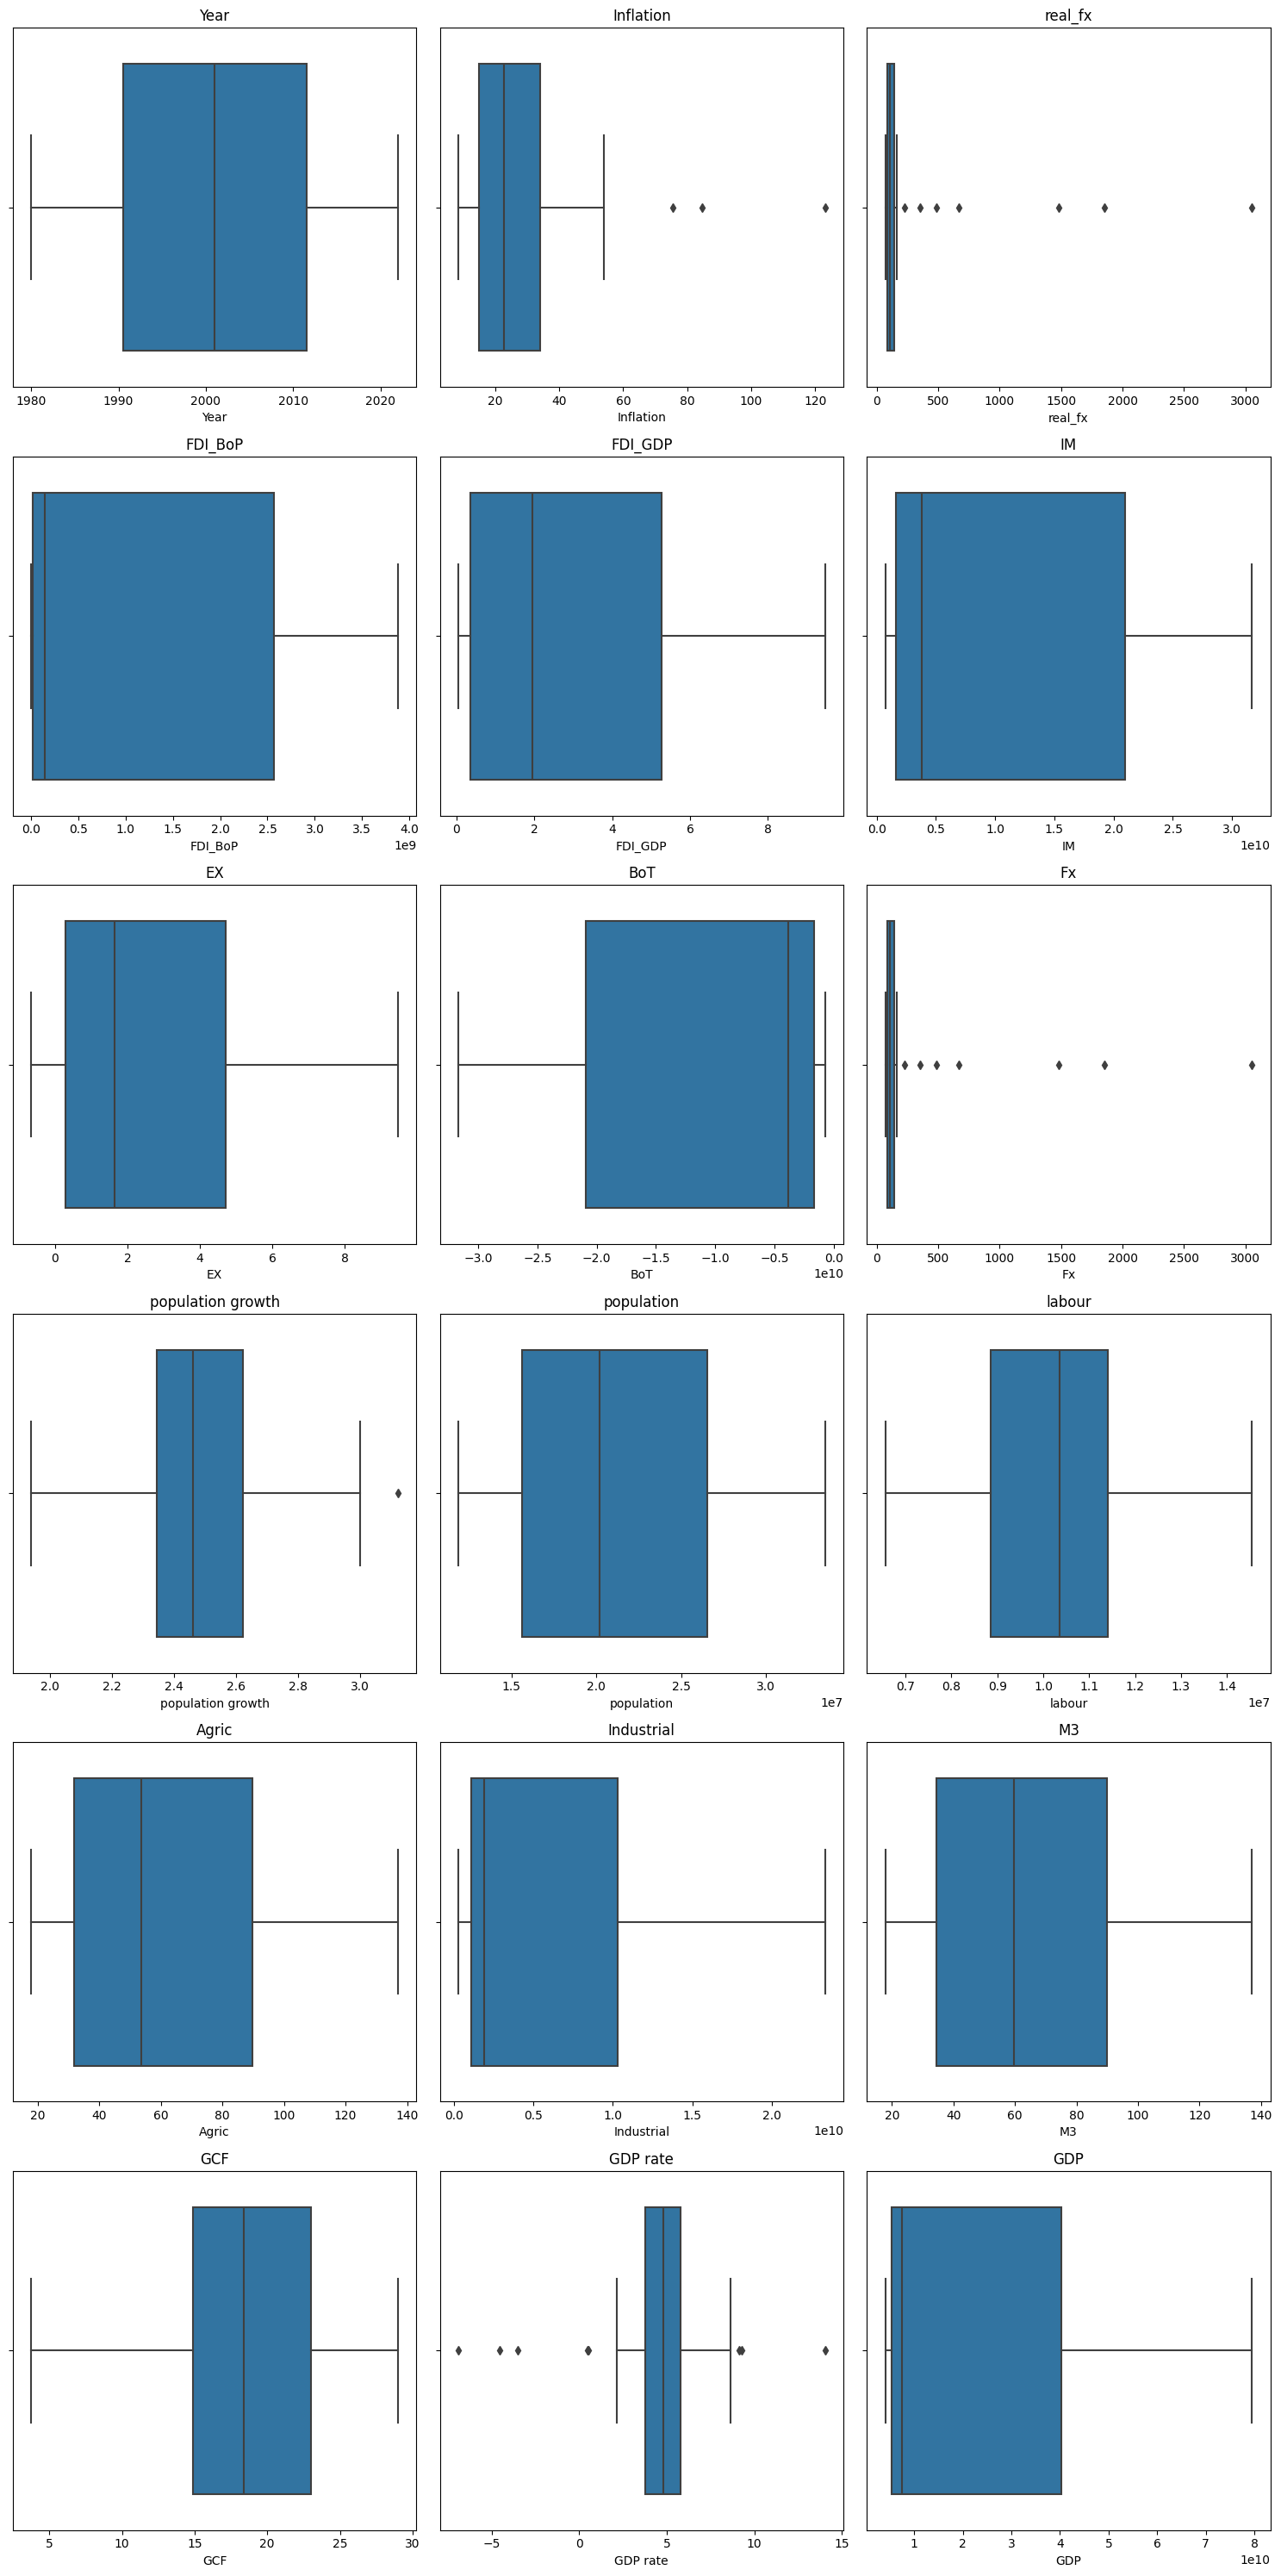

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#Get names of all numerical feature
num_vars=data.select_dtypes(include=['int','float']).columns.tolist()

# Create a figure with subplots

num_cols=len(num_vars)
num_rows=(num_cols+2)//3
fig,axes=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axes=axes.flatten()

# Create a countplot for the top 6  values 
for i, var in enumerate(num_vars):
    sns.boxplot(x=data[var],ax=axes[i])
    axes[i].set_title(var)
    
# Remove any extra empty subplots if needed
if num_cols < len(axes):
    for i in range(num_cols,len(axes)):
        fig.delaxes(axes[i])
        
# Adjust spacing  between subplots
fig.tight_layout()

    

SUMMARY

You can talk about outliers and skewness here




### Dealing with outliers and skewness

In [13]:
trans=data.select_dtypes(include=['float','int']).columns.tolist()
from sklearn.preprocessing import PowerTransformer


# Create the PowerTransformer
transformer = PowerTransformer(method='yeo-johnson', standardize=True)

# Fit and transform the selected columns
data[trans] = transformer.fit_transform(data[trans])


# Function to detect and handle outliers
def handle_outliers(data, trans):
    for col in trans:
        # Calculate the interquartile range (IQR)
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        
        # Identify outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[~((data[col] >= lower_bound) & (data[col] <= upper_bound))].index
        
        # Handle outliers (replace with the median)
        data.loc[outliers, col] = data[col].median()
    
    return data

# Call the function to handle outliers
data = handle_outliers(data, trans)

# Check the updated DataFrame
data.head()

,Year,Inflation,real_fx,FDI_BoP,FDI_GDP,IM,EX,BoT,Fx,population growth,population,labour,Agric,Industrial,M3,GCF,GDP rate,GDP
0,-1.693678,1.262899,1.847014,-1.022365,-1.102853,-1.136008,0.374706,1.136008,1.847014,1.921612,-1.715939,0.077915,-1.486736,-1.283812,-1.574357,-0.072313,-1.265783,-1.172622
1,-1.612888,1.725884,1.981996,-1.007537,-1.068700,-1.085661,-2.369668,1.085661,1.981996,1.566196,-1.625256,0.077915,-1.513631,-1.564011,-1.687721,-0.072313,-0.018925,-1.258863
2,-1.532109,0.386414,2.000917,-1.006743,-1.050415,-1.443633,-0.601343,1.443633,2.000917,1.956439,-1.530885,0.077915,-1.629962,-1.965650,-1.698330,-0.072313,-0.018925,-1.336324
3,-1.451339,2.206200,2.028334,-1.649826,-1.435759,-1.654364,-0.903357,1.654364,2.028334,-0.044696,-1.432505,0.077915,-1.640875,-1.904019,-1.352757,-2.258638,-0.018925,-1.327220
4,-1.370580,0.752702,1.742590,-1.707075,-1.453778,-1.544725,-1.301028,1.544725,1.742590,0.966007,-1.346576,0.077915,-1.287662,-1.393087,-1.366300,-1.859616,-0.018925,-1.184973


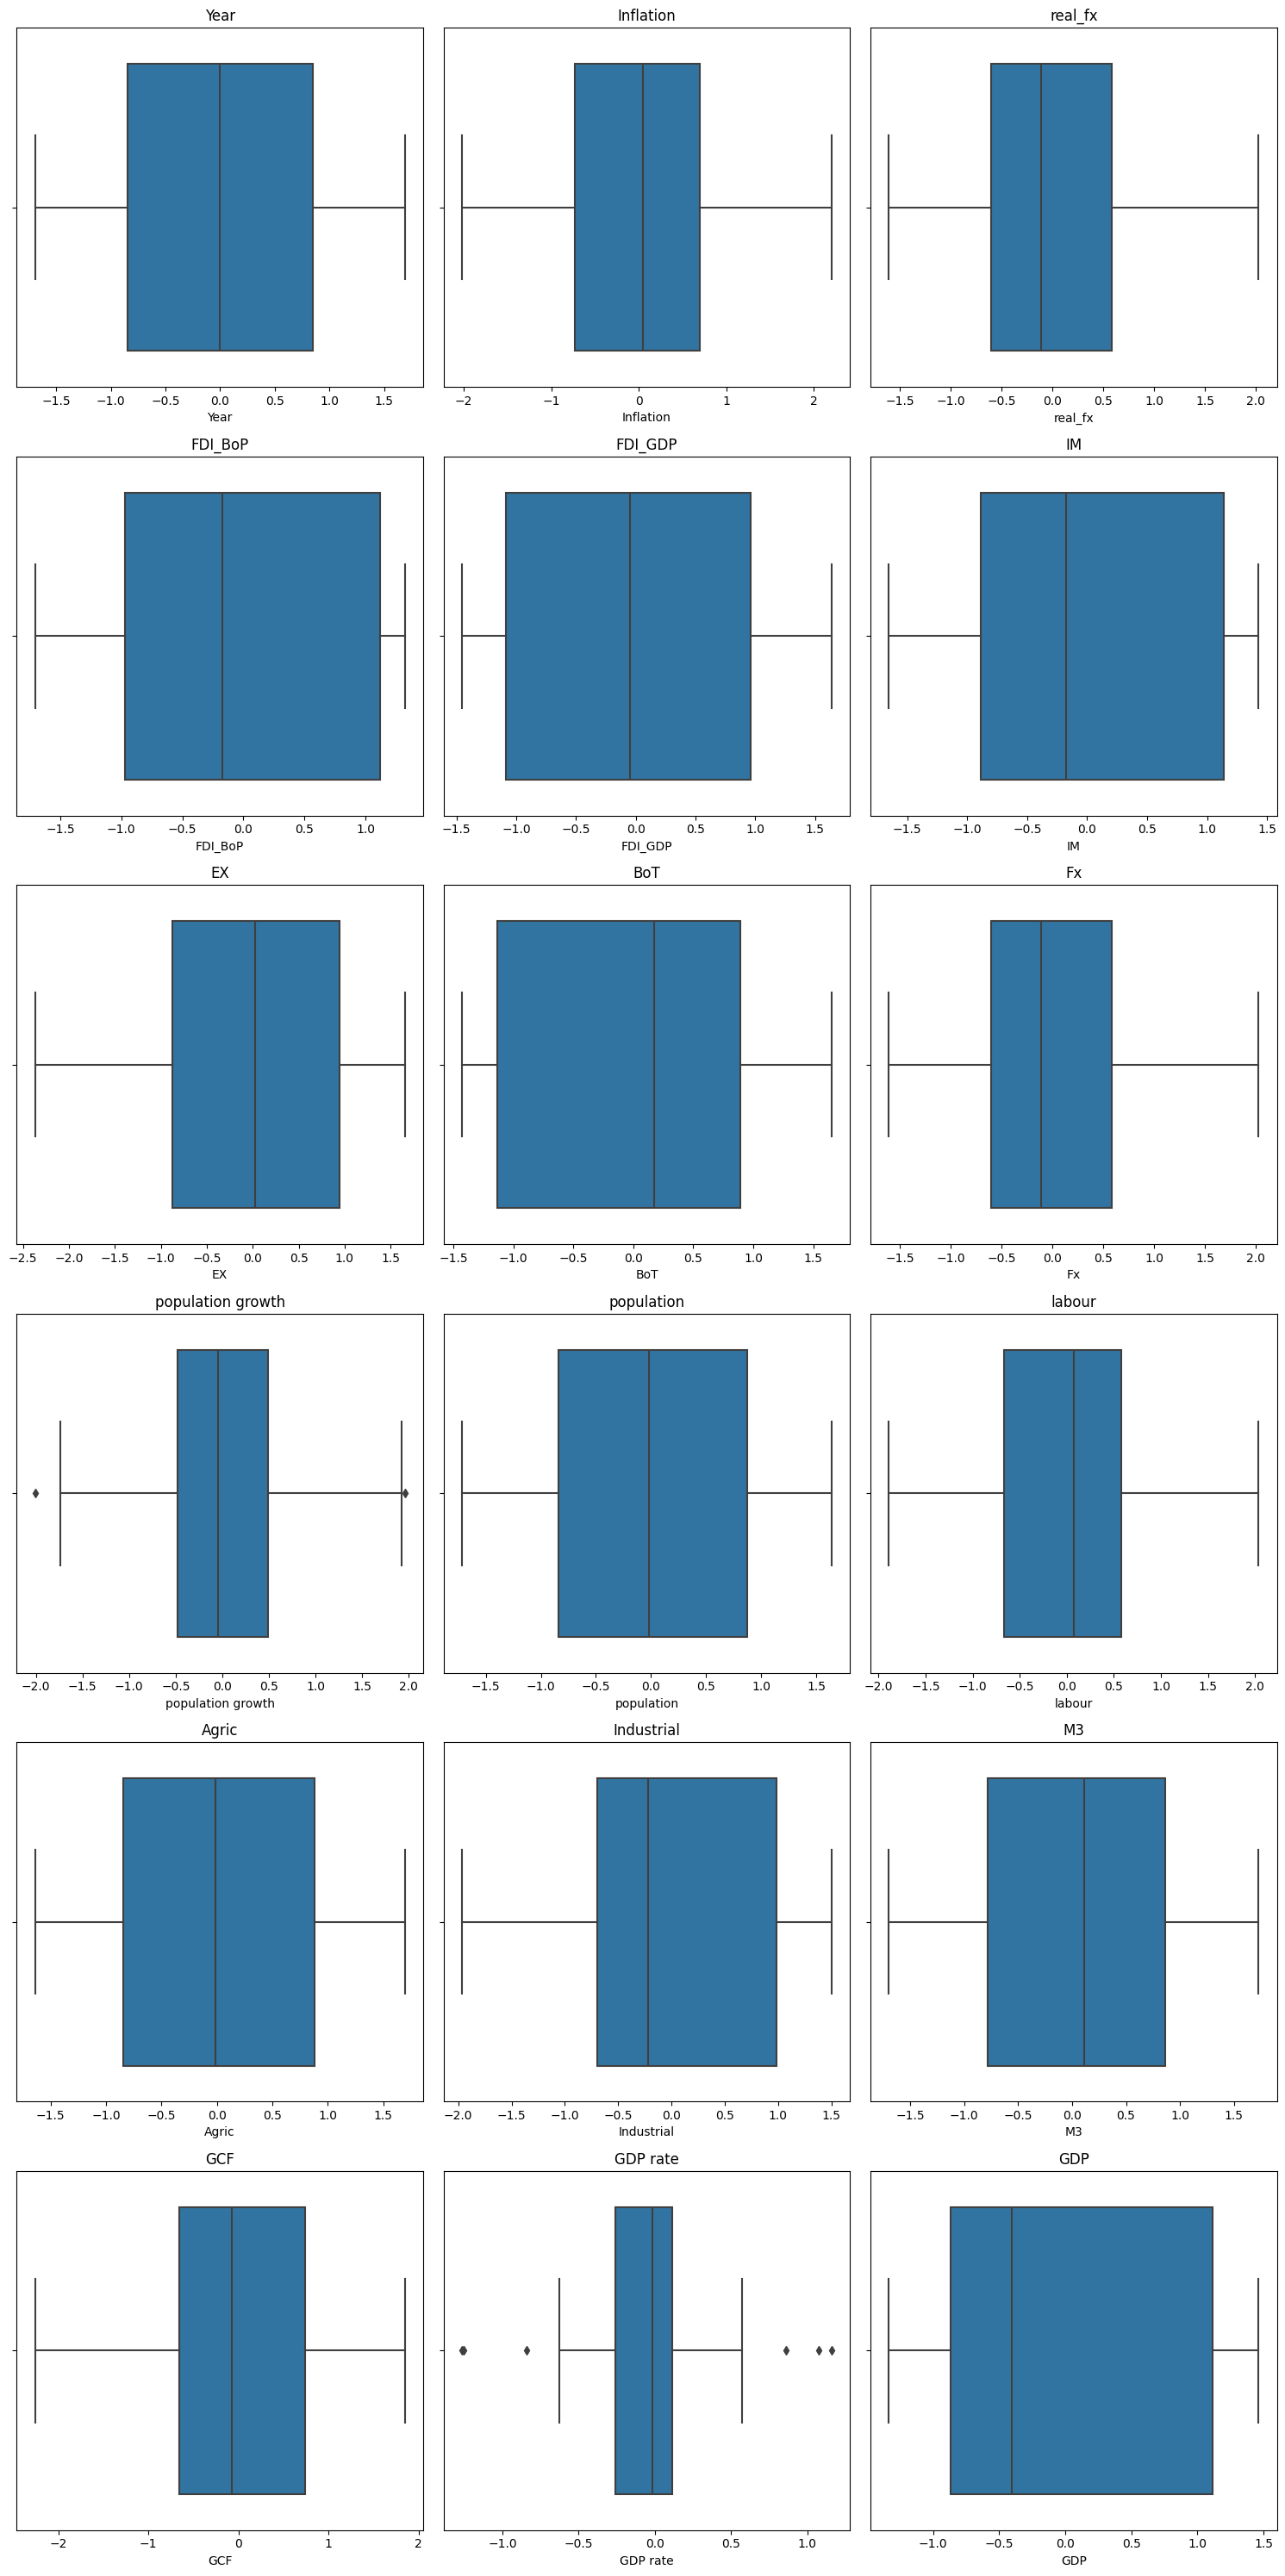

In [14]:
#Get names of all numerical feature
num_vars=data.select_dtypes(include=['int','float']).columns.tolist()

# Create a figure with subplots

num_cols=len(num_vars)
num_rows=(num_cols+2)//3
fig,axes=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axes=axes.flatten()

# Create a countplot for the top 6  values 
for i, var in enumerate(num_vars):
    sns.boxplot(x=data[var],ax=axes[i])
    axes[i].set_title(var)
    
# Remove any extra empty subplots if needed
if num_cols < len(axes):
    for i in range(num_cols,len(axes)):
        fig.delaxes(axes[i])
        
# Adjust spacing  between subplots
fig.tight_layout()

    

### Correlation

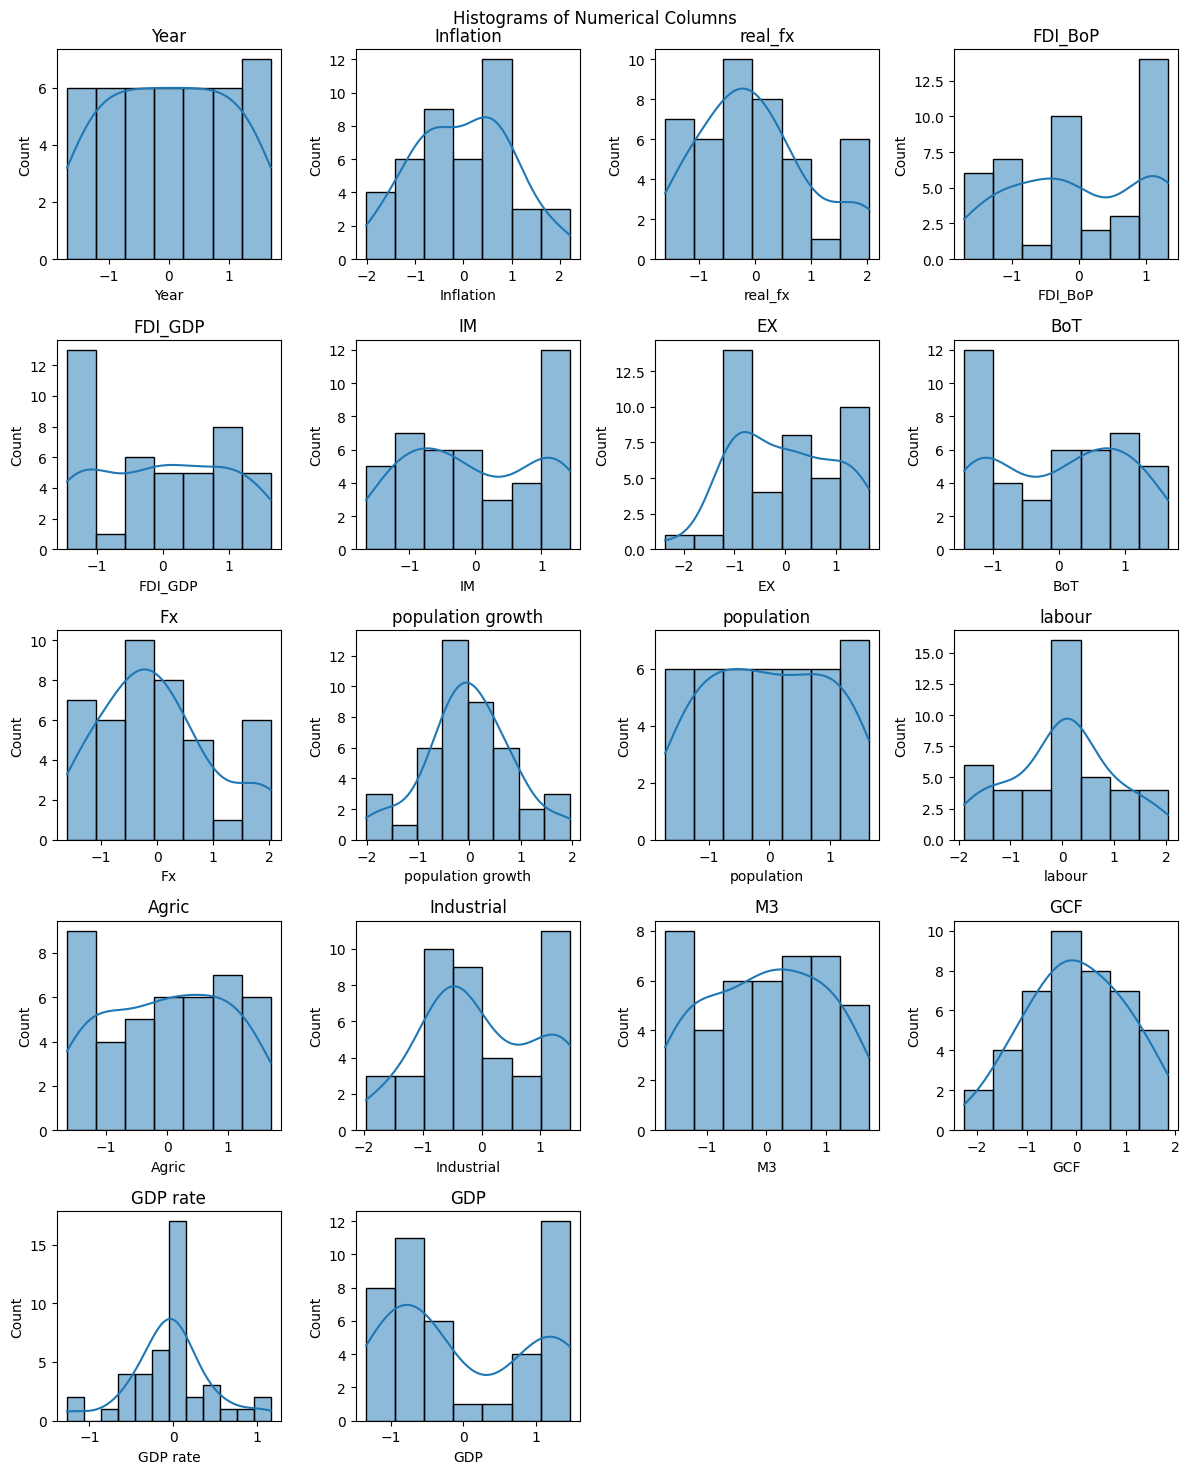

Correlation Matrix:
                       Year  Inflation   real_fx   FDI_BoP   FDI_GDP  \
Year               1.000000  -0.629536 -0.916922  0.932149  0.814012   
Inflation         -0.629536   1.000000  0.578104 -0.573047 -0.497164   
real_fx           -0.916922   0.578104  1.000000 -0.835344 -0.750069   
FDI_BoP            0.932149  -0.573047 -0.835344  1.000000  0.948610   
FDI_GDP            0.814012  -0.497164 -0.750069  0.948610  1.000000   
IM                 0.981758  -0.613077 -0.870640  0.966467  0.858786   
EX                 0.843304  -0.536721 -0.752628  0.795286  0.680722   
BoT               -0.981758   0.613077  0.870640 -0.966467 -0.858786   
Fx                -0.916922   0.578104  1.000000 -0.835344 -0.750069   
population growth -0.528172   0.499843  0.536191 -0.435619 -0.339035   
population         0.999824  -0.629363 -0.914878  0.934330  0.818139   
labour             0.605837  -0.316572 -0.384024  0.527108  0.350082   
Agric              0.995492  -0.626381 -0.91

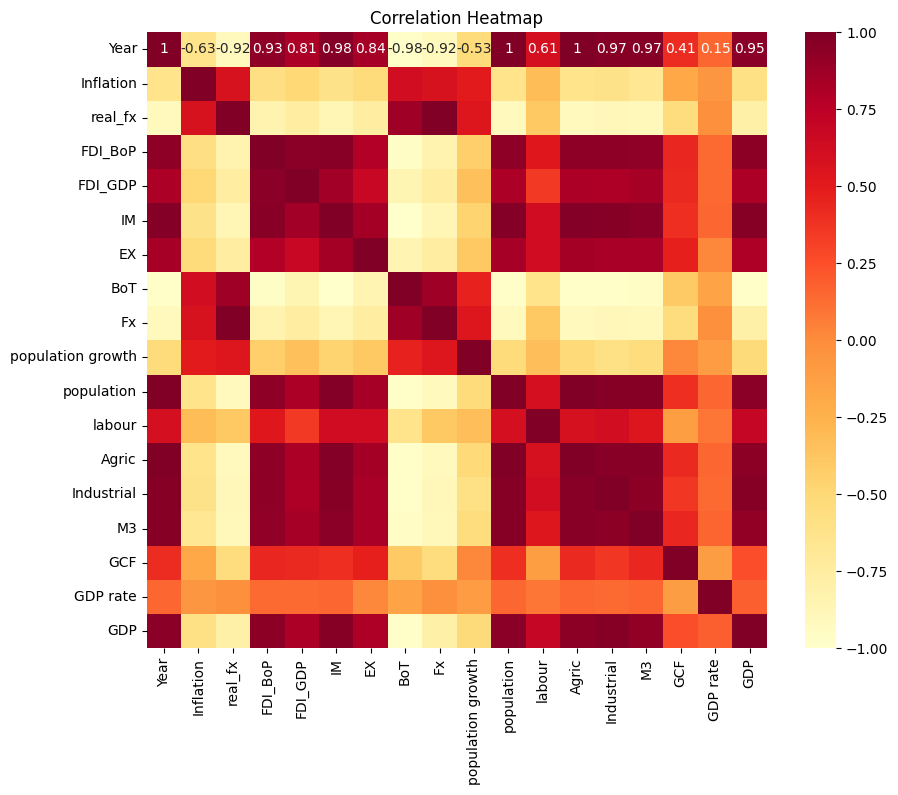

In [15]:

# Visualize distributions
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = len(num_vars)
num_rows = (num_cols + 3) // 4  # Ceiling division to ensure enough rows
plt.figure(figsize=(12, num_rows * 3))

for i, col in enumerate(num_vars, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)

plt.suptitle("Histograms of Numerical Columns")
plt.tight_layout()
plt.show()

# Check for correlations
print("Correlation Matrix:")
print(data[num_vars].corr())
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_vars].corr(), annot=True, cmap="YlOrRd")
plt.title("Correlation Heatmap")
plt.show()


Pay attention to their correlation and write something based on what you have studied in Metrics( correlation between the independent variables and also the correlation between the independent variables and the dependent variable(GDP))

# MACHINE LEARNING

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [17]:
# Load and split the data
X = data.drop("GDP",axis=1)  # Input features
y = data["GDP"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Defining the ANN model

In [18]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu')) 




model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

In [19]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 0.9989 - mean_absolute_error: 0.9443
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 10/100
2/2 [==========

2/2 [==============================] - 0s 4ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 77/100
2/2 [==============================] - 0s 6ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 78/100
2/2 [==============================] - 0s 11ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 79/100
2/2 [==============================] - 0s 0s/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 80/100
2/2 [==============================] - 0s 0s/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 81/100
2/2 [==============================] - 0s 10ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 82/100
2/2 [==============================] - 0s 10ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 83/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 84/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9782 - mean_absolute_error: 0.9335
Epoch 85/100
2/2 [=============

# Hypertuning

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'units_1': [32, 64, 128],
    'units_2': [16, 32, 64],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,scoring="f1_macro")
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print('Best Params:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

TypeError: Cannot clone object '<keras.src.engine.sequential.Sequential object at 0x00000160A0126F10>' (type <class 'keras.src.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.